# **Assignment 7.1: Deep Learning for Regression and Classification**

Objective

In this assignment, you will be working on a real-world dataset to build deep neural networks for regression and classification problems. You will use the Keras library to build and train deep learning models. The dataset that you will be working on is the Boston Housing dataset, which contains information about houses in Boston.

Note: You are free to use any deep learning library of your choice (e.g., TensorFlow, PyTorch, and others).

`Part 1: Regression Problem`

You are required to build a deep neural network model to predict the median value of owner-occupied homes in thousands of dollars (target variable) using the given features in the dataset.

`Follow the steps below:`

-   Load the Boston Housing dataset from the Keras library.
-   Explore and preprocess the data (e.g., normalization, one-hot encoding, etc.).
-   Split the data into training and testing sets.
-   Define a deep neural network architecture for regression using Keras.
-   Train the model on the training set and evaluate its performance on the testing set.
-   Tune the hyperparameters of the model to achieve better performance (e.g., number of hidden layers, activation functions, learning rate, number of epochs, etc.).
-   Compare the performance of the tuned model with the baseline model (i.e., the initial model without any hyperparameter tuning).


___

`Part 2: Classification Problem`

You are required to build a deep neural network model to classify whether a given house is expensive (1) or not (0) based on the given features in the dataset.

`Follow the steps below:`

-   Load the Boston Housing dataset from the Keras library.
-   Explore and preprocess the data (e.g., normalization, one-hot encoding, etc.).
-   Convert the target variable into a binary variable (i.e., expensive or not expensive).
-   Split the data into training and testing sets.
-   Define a deep neural network architecture for classification using Keras.
-   Train the model on the training set and evaluate its performance on the testing set.
-   Tune the hyperparameters of the model to achieve better performance (e.g., number of hidden layers, activation functions, learning rate, number of epochs, etc.).
-   Compare the performance of the tuned model with the baseline model (i.e., the initial model without any hyperparameter tuning).

In [52]:
# standard libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# loading data in pandas dataframe
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# filling missing values with the mean of the column 
df.fillna(df.mean(), inplace=True)

In [4]:
# null values check
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### **Dataset Description**

-   `CRIM` - per capita crime rate by town
-   `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
-   `INDUS` - proportion of non-retail business acres per town.
-   `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
-   `NOX` - nitric oxides concentration (parts per 10 million)
-   `RM` - average number of rooms per dwelling
-   `AGE` - proportion of owner-occupied units built prior to 1940
-   `DIS` - weighted distances to five Boston employment centres
-   `RAD` - index of accessibility to radial highways
-   `TAX` - full-value property-tax rate per $10,000
-   `PTRATIO` - pupil-teacher ratio by town
-   `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
-   `LSTAT` - % lower status of the population
-   `MEDV` - Median value of owner-occupied homes in $1000's

In [5]:
# making a column from the mdev column x 1000 to make it the cost of the house
df['cost'] = df['medv'] * 1000
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,cost
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24000.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21600.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34700.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33400.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36200.0


In [7]:
# getting the mean of the cost column
mean_cost = df['cost'].mean()
print(mean_cost)

22532.806324110672


In [8]:
# printing how many rows are over mean cost
print(df[df['cost'] > mean_cost].shape[0])


209


In [9]:
print(df.shape)

(506, 15)


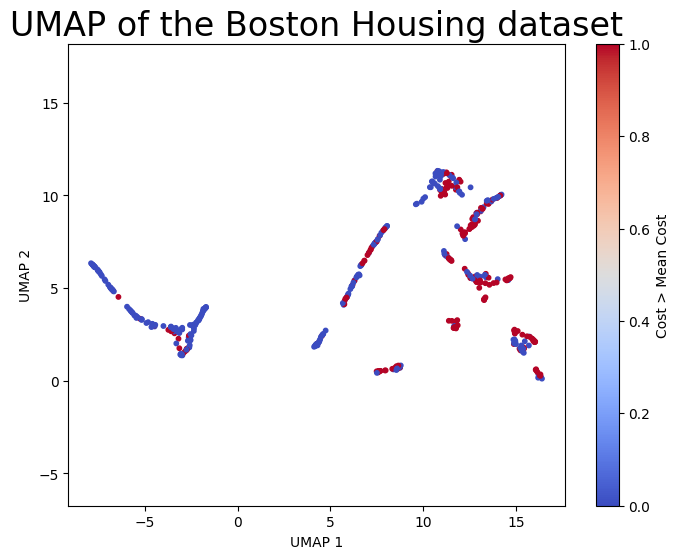

In [19]:
# making a 2d umap plot where if the cost is over the mean it is red and if it is under the mean it is blue

import umap.umap_ as umap

# umap projection
reducer = umap.UMAP()
embedding = reducer.fit_transform(df.drop(['cost', 'medv'], axis=1))


plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=(df['cost'] > mean_cost), cmap='coolwarm', s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(label='Cost > Mean Cost')
plt.title('UMAP of the Boston Housing dataset', fontsize=24)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

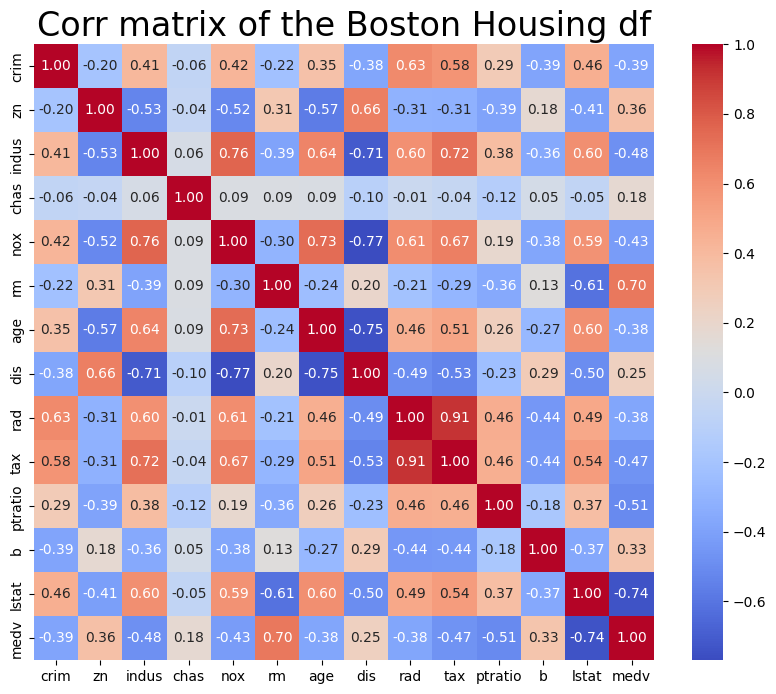

In [18]:
# making a correlation matrix of the columns, dropping the cost column as it is the same as the medv column
corr = df.drop('cost', axis=1).corr()

# plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Corr matrix of the Boston Housing df', fontsize=24)
plt.show()

### **Dataset Description**

-   `CRIM` - per capita crime rate by town
-   `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
-   `INDUS` - proportion of non-retail business acres per town.
-   `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
-   `NOX` - nitric oxides concentration (parts per 10 million)
-   `RM` - average number of rooms per dwelling
-   `AGE` - proportion of owner-occupied units built prior to 1940
-   `DIS` - weighted distances to five Boston employment centres
-   `RAD` - index of accessibility to radial highways
-   `TAX` - full-value property-tax rate per $10,000
-   `PTRATIO` - pupil-teacher ratio by town
-   `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
-   `LSTAT` - % lower status of the population
-   `MEDV` - Median value of owner-occupied homes in $1000's

In [21]:
# priniting the top 5 correlated columns with the cost column
print(corr['medv'].sort_values(ascending=False).head(6))

medv    1.000000
rm      0.695375
zn      0.360445
b       0.333461
dis     0.249929
chas    0.175260
Name: medv, dtype: float64


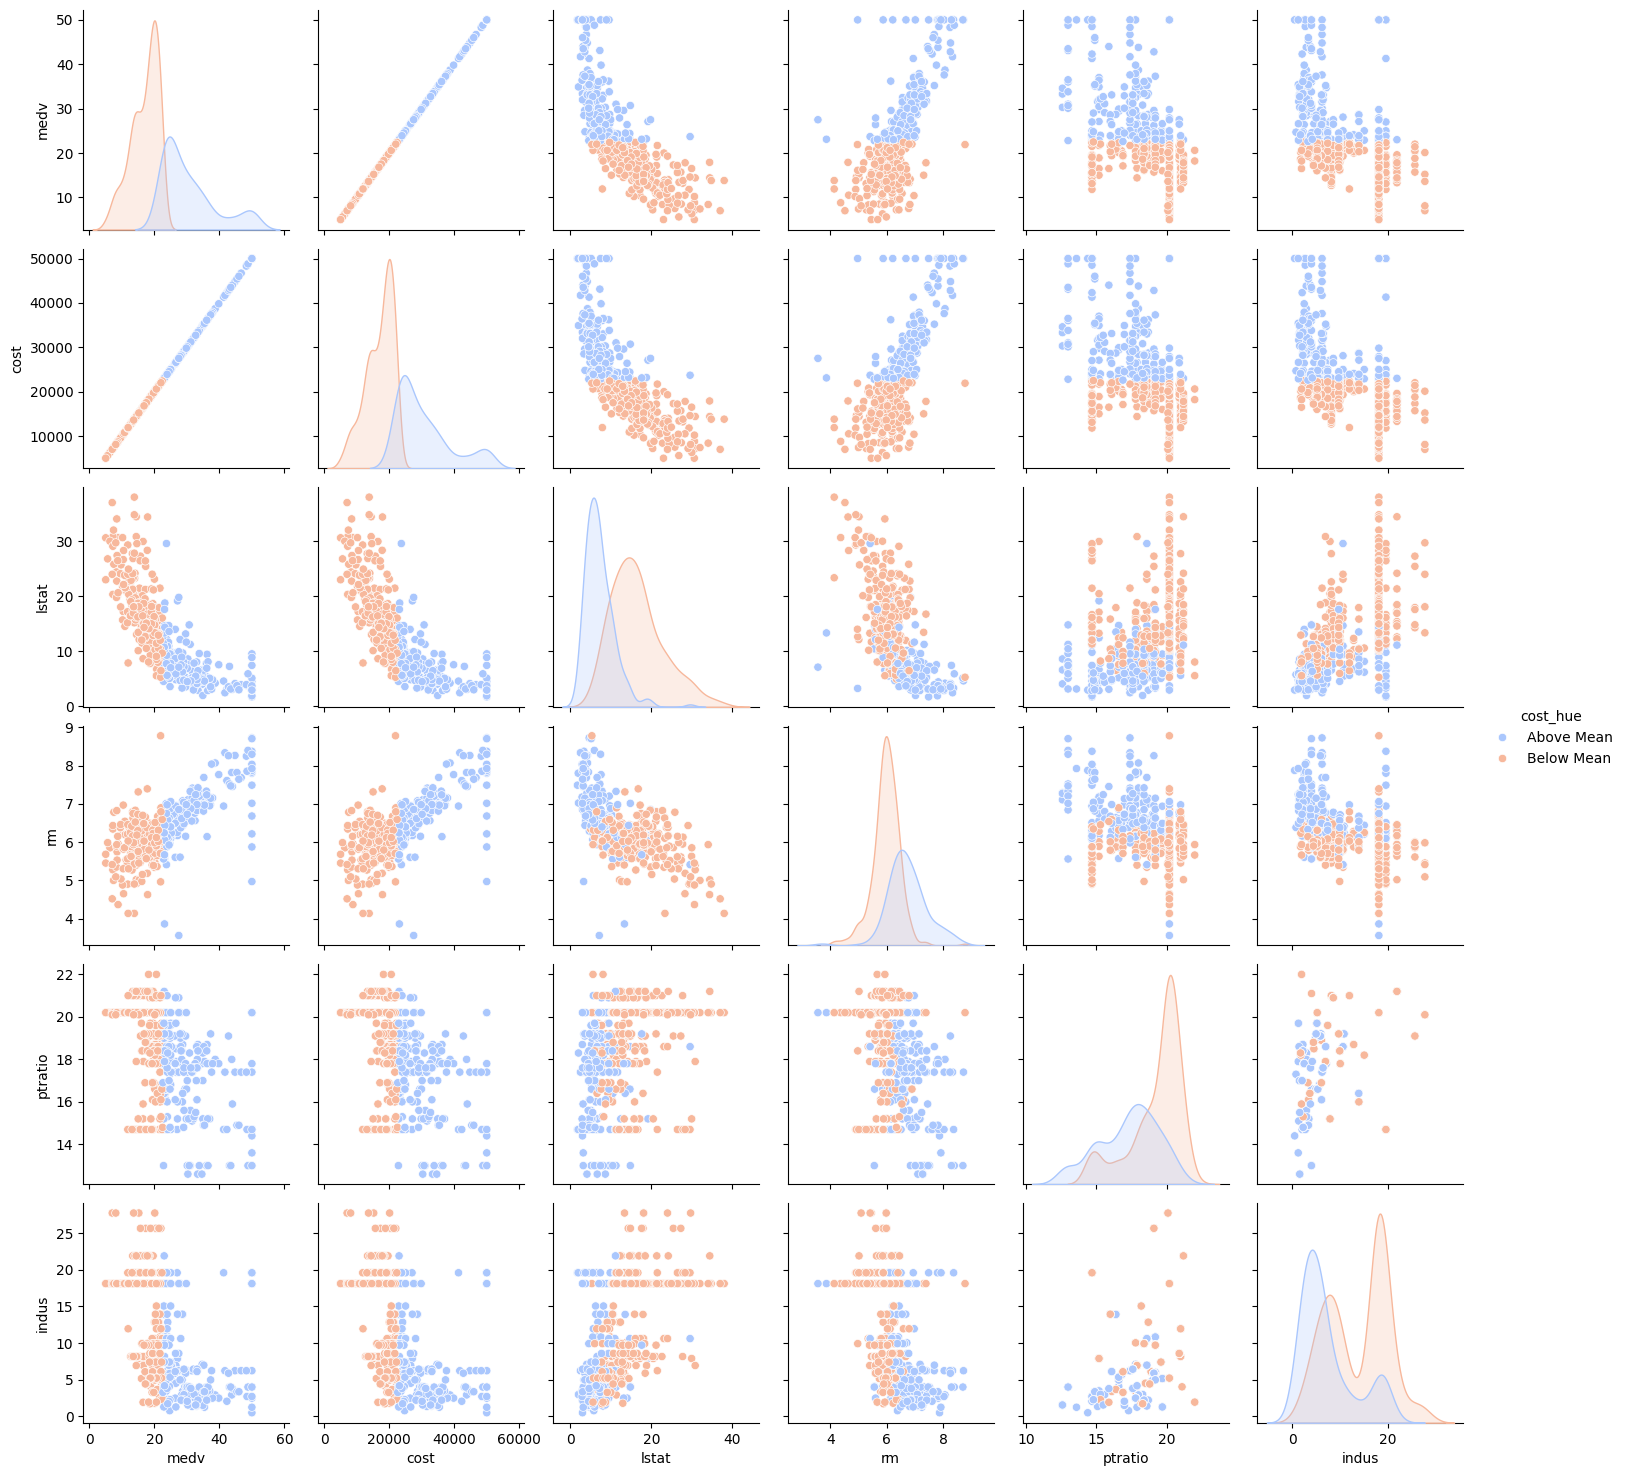

In [25]:
# making a pairplot of the top 5 correlated columns with the medv column and for if the cost is over the mean cost making the dots red 

corr = df.corr()
top5_corr = corr['medv'].abs().sort_values(ascending=False).head(6).index.tolist()
top5_corr.remove('medv')
df['cost_hue'] = np.where(df['cost'] > mean_cost, 'Above Mean', 'Below Mean')
sns.pairplot(df[['medv'] + top5_corr + ['cost_hue']], hue='cost_hue', palette='coolwarm')
plt.show()


In [36]:
# using tensorflow to train the regression model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# using mean squared error as the loss function due to it being a regression problem

In [37]:
# reload for fresh start
df = pd.read_csv('BostonHousing.csv')
df.fillna(df.mean(), inplace=True)

# split the data 
X = df.drop(['medv'], axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# another split 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [40]:
# converting to numpy array
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

In [41]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train, y_train, epochs=30, batch_size=30, validation_split=0.2, verbose=1)

Epoch 1/30
9/9 [==============================] - 1s 24ms/step - loss: 616.7062 - val_loss: 474.9155
Epoch 2/30
9/9 [==============================] - 0s 5ms/step - loss: 559.9329 - val_loss: 404.6406
Epoch 3/30
9/9 [==============================] - 0s 5ms/step - loss: 438.9229 - val_loss: 264.9190
Epoch 4/30
9/9 [==============================] - 0s 5ms/step - loss: 230.9891 - val_loss: 115.8200
Epoch 5/30
9/9 [==============================] - 0s 5ms/step - loss: 112.4836 - val_loss: 113.7071
Epoch 6/30
9/9 [==============================] - 0s 5ms/step - loss: 63.2695 - val_loss: 47.6970
Epoch 7/30
9/9 [==============================] - 0s 6ms/step - loss: 44.0942 - val_loss: 39.1560
Epoch 8/30
9/9 [==============================] - 0s 8ms/step - loss: 32.3978 - val_loss: 32.4470
Epoch 9/30
9/9 [==============================] - 0s 6ms/step - loss: 26.4213 - val_loss: 29.6300
Epoch 10/30
9/9 [==============================] - 0s 6ms/step - loss: 23.1585 - val_loss: 28.1794
Epoch 11

In [10]:
# Evaluating the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Making predictions
y_pred = model.predict(X_test)

# Calculate the prediction accuracy
accuracy = np.mean(np.abs(y_pred - y_test.values.reshape(-1, 1)) < 1)
within_1 = np.sum(np.abs(y_pred - y_test.values.reshape(-1, 1)) < 1)
within_2 = np.sum(np.abs(y_pred - y_test.values.reshape(-1, 1)) < 2)

print(f'Accuracy: {accuracy}')
print(f'Number of predictions within 1 unit of the actual value: {within_1}')
print(f'Number of predictions within 2 units of the actual value: {within_2}')

4/4 [==============================] - 0s 0s/step - loss: 14.4959
Test Loss: 14.49594497680664
4/4 [==============================] - 0s 930us/step
Accuracy: 0.30392156862745096
Number of predictions within 1 unit of the actual value: 31
Number of predictions within 2 units of the actual value: 54


### Changes from last model to this model are the layers, and some Neuron changes

In [11]:
# Remaking the model 

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [12]:
history_2 = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
11/11 [==============================] - 1s 23ms/step - loss: 588.3419 - val_loss: 545.6750
Epoch 2/30
11/11 [==============================] - 0s 5ms/step - loss: 531.7380 - val_loss: 460.5020
Epoch 3/30
11/11 [==============================] - 0s 5ms/step - loss: 412.8017 - val_loss: 294.7219
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 218.0894 - val_loss: 96.3502
Epoch 5/30
11/11 [==============================] - 0s 7ms/step - loss: 89.6801 - val_loss: 75.1359
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 60.0053 - val_loss: 48.9807
Epoch 7/30
11/11 [==============================] - 0s 4ms/step - loss: 37.4621 - val_loss: 42.7141
Epoch 8/30
11/11 [==============================] - 0s 4ms/step - loss: 27.4579 - val_loss: 37.4692
Epoch 9/30
11/11 [==============================] - 0s 4ms/step - loss: 25.7285 - val_loss: 34.3558
Epoch 10/30
11/11 [==============================] - 0s 5ms/step - loss: 22.9786 - val_loss:

In [13]:
# Evaluating the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

4/4 [==============================] - 0s 1ms/step - loss: 11.7100
Test Loss: 11.709955215454102


In [16]:
# printing the RMSE of the model to see how well it did 
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) 
print(f'RMSE: {rmse}')

RMSE: 3.8073540721824974


In [19]:
history_3 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
11/11 [==============================] - 0s 9ms/step - loss: 0.6559 - val_loss: 14.4762
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 0.5971 - val_loss: 14.9040
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 0.6412 - val_loss: 14.7191
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.7789 - val_loss: 14.5413
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 0.6663 - val_loss: 14.8518
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 1.3298 - val_loss: 13.8415
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 1.0599 - val_loss: 14.8756
Epoch 8/50
11/11 [==============================] - 0s 5ms/step - loss: 0.8532 - val_loss: 14.3045
Epoch 9/50
11/11 [==============================] - 0s 4ms/step - loss: 0.7931 - val_loss: 15.0264
Epoch 10/50
11/11 [==============================] - 0s 5ms/step - loss: 0.7634 - val_loss: 15.2047
Epoch 11/

In [20]:
# Evaluating the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

4/4 [==============================] - 0s 4ms/step - loss: 13.0513
Test Loss: 13.051252365112305


#### Our test loss from the 2nd model to this model actually got worse so the second model is the better model for our needs

## Section 2 

`Part 2: Classification Problem`

You are required to build a deep neural network model to classify whether a given house is expensive (1) or not (0) based on the given features in the dataset.

`Follow the steps below:`

-   Load the Boston Housing dataset from the Keras library.
-   Explore and preprocess the data (e.g., normalization, one-hot encoding, etc.).
-   Convert the target variable into a binary variable (i.e., expensive or not expensive).
-   Split the data into training and testing sets.
-   Define a deep neural network architecture for classification using Keras.
-   Train the model on the training set and evaluate its performance on the testing set.
-   Tune the hyperparameters of the model to achieve better performance (e.g., number of hidden layers, activation functions, learning rate, number of epochs, etc.).
-   Compare the performance of the tuned model with the baseline model (i.e., the initial model without any hyperparameter tuning).



In [42]:
# loading the data again for a fresh start
df = pd.read_csv('BostonHousing.csv')
df.fillna(df.mean(), inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [43]:
# making a cost column
df['cost'] = df['medv'] * 1000
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,cost
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24000.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21600.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34700.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33400.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36200.0


In [44]:
# making a new column called expensive where if the cost is over the mean cost it is 1 and if it is under the mean cost it is 0
mean_cost = df['cost'].mean()
df['expensive'] = np.where(df['cost'] > mean_cost, 1, 0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,cost,expensive
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24000.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21600.0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34700.0,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33400.0,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36200.0,1


In [45]:
# dropping the medv and cost columns from the dataframe
df.drop(['medv', 'cost'], axis=1, inplace=True)
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,expensive
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,1


In [46]:
# expensive will be the target column for the classification model
X = df.drop('expensive', axis=1)
y = df['expensive']

# splitting the data to train and test sets for the classification model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling the data for the classification model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# another split for the classification model
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [47]:
# making the classification model with tensorflow same as the regression model but with a sigmoid activation function in the last layer for binary classification
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [48]:
# compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
# training the model
classifier_1_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
11/11 [==============================] - 1s 23ms/step - loss: 0.6208 - accuracy: 0.7152 - val_loss: 0.5548 - val_accuracy: 0.7901
Epoch 2/30
11/11 [==============================] - 0s 5ms/step - loss: 0.4740 - accuracy: 0.8266 - val_loss: 0.4870 - val_accuracy: 0.8148
Epoch 3/30
11/11 [==============================] - 0s 5ms/step - loss: 0.3766 - accuracy: 0.8638 - val_loss: 0.4609 - val_accuracy: 0.8519
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 0.3277 - accuracy: 0.8854 - val_loss: 0.4260 - val_accuracy: 0.8395
Epoch 5/30
11/11 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.8824 - val_loss: 0.4069 - val_accuracy: 0.8395
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 0.2753 - accuracy: 0.9040 - val_loss: 0.3902 - val_accuracy: 0.8395
Epoch 7/30
11/11 [==============================] - 0s 5ms/step - loss: 0.2604 - accuracy: 0.9009 - val_loss: 0.3755 - val_accuracy: 0.8519
Epoch 8/30
11/11 [=

In [50]:
# now evaluating the model using sklearn's classification report
from sklearn.metrics import classification_report

# making predictions
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

# printing the classification report
print(classification_report(y_test, y_pred))

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        65
           1       0.97      0.86      0.91        37

    accuracy                           0.94       102
   macro avg       0.95      0.92      0.93       102
weighted avg       0.94      0.94      0.94       102



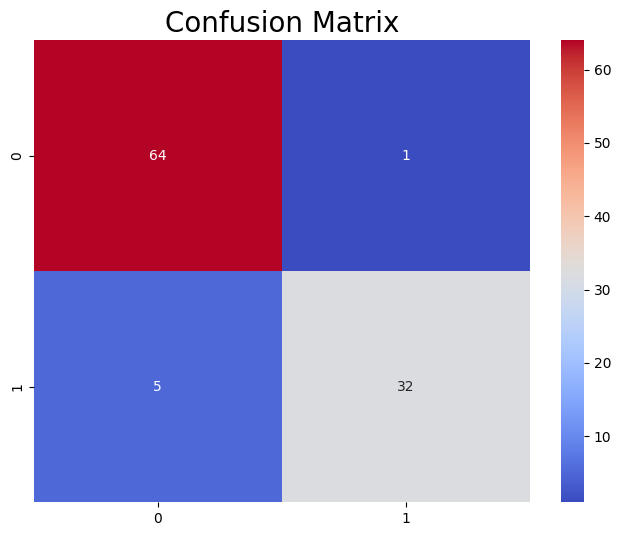

In [53]:
# making a confusion matrix to see how well the model did
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [54]:
# making one more model with one more layer to see if we can get better results
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
# compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
# training the model 
classifier_2_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
11/11 [==============================] - 1s 27ms/step - loss: 0.6370 - accuracy: 0.6935 - val_loss: 0.5907 - val_accuracy: 0.7901
Epoch 2/30
11/11 [==============================] - 0s 4ms/step - loss: 0.5301 - accuracy: 0.7988 - val_loss: 0.5234 - val_accuracy: 0.8272
Epoch 3/30
11/11 [==============================] - 0s 4ms/step - loss: 0.4454 - accuracy: 0.8359 - val_loss: 0.4917 - val_accuracy: 0.8272
Epoch 4/30
11/11 [==============================] - 0s 4ms/step - loss: 0.3757 - accuracy: 0.8638 - val_loss: 0.4424 - val_accuracy: 0.8395
Epoch 5/30
11/11 [==============================] - 0s 4ms/step - loss: 0.3327 - accuracy: 0.8824 - val_loss: 0.4160 - val_accuracy: 0.8519
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 0.3037 - accuracy: 0.8885 - val_loss: 0.3886 - val_accuracy: 0.8642
Epoch 7/30
11/11 [==============================] - 0s 7ms/step - loss: 0.2759 - accuracy: 0.8916 - val_loss: 0.3901 - val_accuracy: 0.8642
Epoch 8/30
11/11 [=

In [57]:
# pred 
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

print(classification_report(y_test, y_pred))

4/4 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        65
           1       0.91      0.86      0.89        37

    accuracy                           0.92       102
   macro avg       0.92      0.91      0.91       102
weighted avg       0.92      0.92      0.92       102



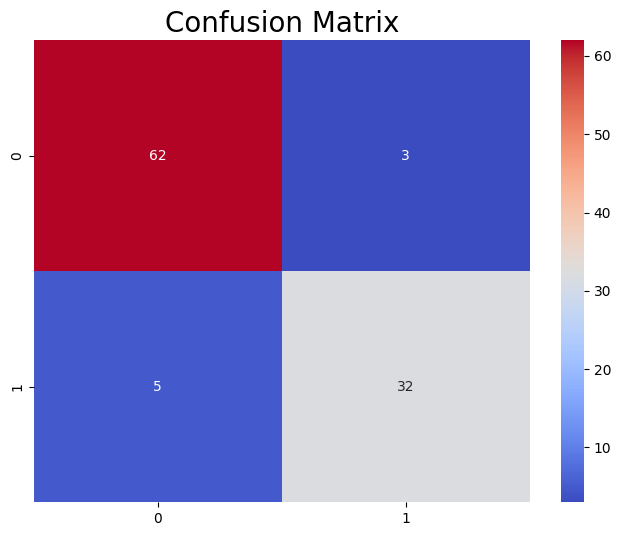

In [58]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix', fontsize=20)
plt.show()


# <span style="color:red">**`All comparisons will be done in the report that is being turned in along with this notebook`**</span>